# Data Science Guild Intro

## Data Science

Data Science is the new buzzword.  This is unfortunate because there are a lot of things data can do well, but there is also a limitation to what you can do with data.  The hype raises expectations in the minds of anyone who doesn't understand the limitations, which tends to be everyone at first.  Then the disappointment comes and we are still left with a lot of data and no way to deal with it.  This is a very unfortunate place to be because we are inundated with data, some relevant, and some noise, and we feel a palpable need for some tools in our collective toolboxes to make sense of it.  More than that, we would like to make sense of it to the end that we can use it to make good decisions and solve difficult problems.  Part of the aim of this guild is to empower you with the knowledge required to understand what you can learn from your data, and also what is going to be difficult to learn.  Many of the skills required to be an effective data science practicioner are quite a bit more foundational than in other guilds.  Because of this, I thought the workshop approach would make the most sense so that we could see the foundations of theories worked out in code and with small-scale practical examples.


## Environment basics


Let's get you started with ipython.  Most of the scientific world is on python 2 (2.7.10).  If you already have python installed, run this in a shell:


`$pip install "ipython[notebook]"`


Otherwise, make your way to http://ipython.org/install.html and follow the instructions.  You can install the anaconda package from continuum which contains all of these:  http://docs.continuum.io/anaconda/pkg-docs.html, or you can just install modules as needed.  Typically `$pip install <module>` works well.  Most of what we will be doing will require numpy/scipy and scikit-learn with some visualizations using matplotlib, but we'll use the natural language toolkit (nltk) as well.

## What if I don't know Python?


We'll do concepts first, Python second.  If the python code obscures the concept, we'll explain the code, but for the most part Python is a POLS (Principle of least surprise) language, so don't worry.  I'll also comment liberally so things are clear, especially for the stuff that can be harder to understand like multi-dimensional array slicing.  Most stuff, however, is pretty intuitive.  For example, if I want to construct a 3x3 identity matrix:

In [33]:
import numpy as np
np.eye(3,3)    #3x3 identity matrix

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

## Topics we'll dive into


* Visualizing Data Models
* Classifiers
* Machine Learning Models
* Testing
* Sample Sizes
* Deploying with pyspark (Apache Spark + python mllib)
* Recommendation
* Similarity Measurements
* Blocking and Indexing Techniques
* Natural Language Processing

### Visualizing Data Models


Plotting is often one of the first steps in making sense of data.  We want to plot data to communicate something about it or to start to make intuitive sense of relationships within the data.  First, it may help to step back and think about something obvious at first.  Our data represents some real world thing in some partial way.  Perhaps it is clicks/hour or likes/dislikes or height or age.  We likely don't (yet anyway ;) have access to the actual thing in someone's head called a "like".  We simply have some interaction data that, hopefully anyway, corresponds to user behavior.  We are trying to use the information we have about this behavior to make inferences about the thing we are actually interested in.  This is the essence of what we call "modeling".  Models are pieces of information that we have about some real-world thing.  Even though they can't possibly be perfect, and we are always curious about the data we don't have, we can learn a lot from the data models we do have.  This learning usually starts with plotting.  For example, ignoring the intuition gained from the code for the moment, what can you say about the first 10 elements of these two sets of data?

In [3]:
import numpy as np
from numpy.random import randn
n=200
def make_penny():
    '''Pennies have a diameter/mass of 19.05mm/2.5g.  
       Assume std/diameter of 0.3mm and std/mass of 0.2g'''
    return np.hstack( ( 0.3 * randn(1) + 19.05, 0.3 * randn(1) + 2.5 ) )
def make_dime():
    '''Dimes have a diameter/mass of 17.91mm/2.268g.  
       Dimes are harder so less std/mass than pennies'''
    return np.hstack( ( 0.2 * randn(1) + 17.91, 0.2 * randn(1) + 2.268 ) )

class1 = np.vstack([ make_penny() for _ in xrange(n) ])
class2 = np.vstack([ make_dime() for _ in xrange(n)])
print( "Class 1:\n {}".format(class1[:10]) )
print( "Class 2:\n {}".format(class2[:10]) )

Class 1:
 [[ 19.08085289   2.08819743]
 [ 19.34326846   2.36258176]
 [ 19.24347833   2.16097722]
 [ 19.30131669   2.64877778]
 [ 19.02793637   2.2781478 ]
 [ 19.58715843   2.28981592]
 [ 19.16969619   2.99564735]
 [ 18.95550819   2.89090092]
 [ 18.90188014   2.64523753]
 [ 19.1413486    2.75111276]]
Class 2:
 [[ 18.01805452   2.01151366]
 [ 17.84433439   1.90838378]
 [ 18.16299011   2.46727567]
 [ 17.66906803   2.14610383]
 [ 18.03585786   2.35701166]
 [ 17.58674669   1.89587415]
 [ 18.20653669   2.0720034 ]
 [ 17.7331861    2.22876517]
 [ 17.75938633   2.22599261]
 [ 17.95569255   2.15846993]]


Fairly inscrutable.  You can tell there are some differences, for example a diameter > 19 doesn't appear in the second class, but it's hard to say how they are distributed.  But if we plot the two sets...

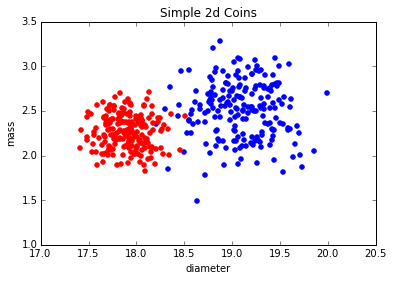

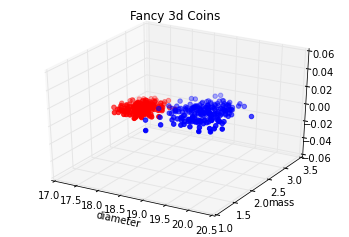

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot 2d
plt.scatter(class1[::,0], class1[::,1], color='b')
plt.scatter(class2[::,0], class2[::,1], color='r')
plt.xlabel('diameter')
plt.ylabel('mass')
plt.title('Simple 2d Coins')

# plot 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class1[::,0], class1[::,1], color='b')
ax.scatter(class2[::,0], class2[::,1], color='r')
ax.set_xlabel('diameter')
ax.set_ylabel('mass')
plt.title('Fancy 3d Coins')

Now we can see some interesting things:
1.  Pennies are blue, dimes are red.  This isn't interesting because that just happens to be how we plotted it.  I just didn't want you to have to scroll up and look at the code to figure that out.
2.  There are two nice groupings of our two types of coins, though there is some overlap.
3.  The data for the pennies is more spread out than the data for the dimes.  Maybe that's because pennies are softer, and so they wear down quicker than dimes.  In fact, if you scroll up and see the way I generated the data I used the formula $$\sigma * randn(1) + \mu$$  rand(1) returns one element randomly selected from a normal distribution with standard deviation 1 and mean of 0.  The standard deviation (sigma) is a measure of the distribution of the data about the mean (mu).  The smaller the std, the tighter the grouping.  For pennies, I picked 0.3 and for dimes I picked 0.2.

###Classifiers

Since our plots gave us some intuition that the two classes of coin were very likely separable by diameter and mass, let's use that intuition to build some code that can tell the difference between dimes and pennies using diameter and mass alone.  We can build a nice little neighborhood classifier to  make predictions about a new coin based on the coin data we've seen so far:

In [36]:
# first, some descriptives
def describe( l ):
    description = { 0: "penny", 1: "dime" }
    return description[l[0]]

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
data = np.vstack( (class1,class2) )
labels = np.hstack( (np.zeros(n), np.ones(n)) )
classifier.fit( data, labels )
print( "It's a {}!".format( describe(classifier.predict( make_penny() )) ) )
print( "It's a {}!".format( describe(classifier.predict( make_dime() )) ) )
print( "It's a {}!".format( describe(classifier.predict( make_penny() )) ) )

It's a penny!
It's a dime!
It's a penny!


Neighborhood classifiers work by simply looking at the k labels surrounding the data in question.  If you are surrounded by mostly blue dots, you must be a blue dot.  If you are surrounded by mostly red dots, you must be a red dot.  There can be some variation in the way distances are measured, but it's really no more complicated than that.

####Questions

1. What about the little red dot surrounded by blue dots?
2. What happens if there is a lot of overlap?  (high variance with close means can cause this)
3. What happens if your input data set gets really large, like instead of n=200, n=2e6?

####Answers

1. The classifier fails at this point.  This is called a "misclassification".
2. You get a lot of misclassification.  We'll talk in the future about feature engineering and how we can improve the separation between the classes.  One way to think about this is this:  Notice that we plotted a 2d data set on a 3d plot for extra fanciness.  This means that what you are seeing is some constant value in the 3rd dimension and the data lives within the 2d plane. If we were to add something other than mass or diameter, like "has ridges?" or "color", even though there is overlap in two dimensions, there would be separation along the third.  In fact, it simply might be the case that color or ridge measurements might be a cleaner way to separate the two classes.  That's where some creativity comes into play in feature engineering.  In absence of that, simply adding features and extra dimensions is a way to create separation between the two groupings.  This is not a silver bullet, however, as arbitrarily increasing the dimensionality of your model runs into lots of problems including overfit and poor generalization, not to mention the additional work required to collect and process the data.  This phenomenon is affectionately called the "Curse of Dimensionality" and we'll discuss it in future meetings.
3. In this example, we would be consuming massive amounts of memory because we would be storing all the points.  You can still use this kind of classifier in production, but you need to treat your neighborhood as a representative sample of your population.  That is, dont't store the whole neighorhood, store a sample of it.  Since the sample variance is a biased consistent estimator of the population variance, our sample will converge to the true neighborhood variance as it's size increases.  We can bound the error on this estimate as a function of sample size and get results that are reasonable without using too much memory.  Perhaps there is a way we can classify without having to store the whole neighborhood...

###Machine Learning Models

Let's think of a different way to classify.  First, let's plot our coin data in 2d again:

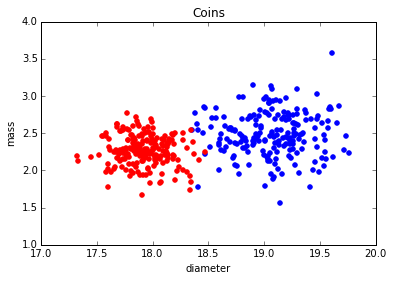

In [37]:
plt.scatter(class1[::,0], class1[::,1], color='b')
plt.scatter(class2[::,0], class2[::,1], color='r')
plt.xlabel('diameter')
plt.ylabel('mass')
plt.title('Coins')

Now, imagine we drew a line something like this:

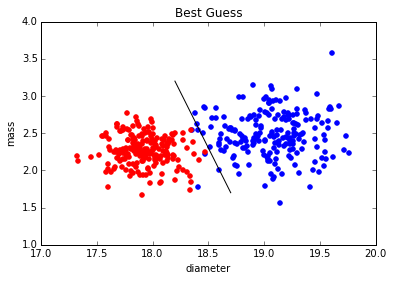

In [38]:
plt.axis()
plt.scatter(class1[::,0], class1[::,1], color='b')
plt.scatter(class2[::,0], class2[::,1], color='r')
plt.plot([18.7, 18.2], [1.7,3.2], 'k-')
plt.xlabel('diameter')
plt.ylabel('mass')
plt.title('Best Guess')

If we simply had the equation for such a line (remember f(x)=mx+b from high school algebra?), couldn't we just do some basic algebra, plug in our data and see which side of the line it falls on?  Then we wouldn't need to store anything other than the equation and, for the prediction function, we could just write a little bit of code to do the math.  Something like this:

In [39]:
def linear_classifier( diamass ):
    '''take in (diameter,mass) and return true if the point is below the line'''
    m = (1.7-3.2)/(18.7-18.2) # solve for slope
    b = 1.7 - m*18.7          # use slope to compute y intercept
    return [ m*diamass[0]+b > diamass[1] ]

print( "It's a {}!".format( describe(linear_classifier( make_penny() )) ) )
print( "It's a {}!".format( describe(linear_classifier( make_dime() )) ) )
print( "It's a {}!".format( describe(linear_classifier( make_penny() )) ) ) 
    

It's a penny!
It's a dime!
It's a penny!


And we get results similar to the neighborhood approach.  Pretty slick stuff.  But how do we find the right line?  And does it have to be a line?  Can it be a curve?  Of course!  We'll talk about kernel functions a bit later.  For now, though, let's focus on what we call linear models, which is a fancy way of saying the two classes can be differentiated by a line or a plane (which is a line in 3d) or a hyperplane (which is a line in Nd).  I pretty much drew a line by hand here, which doesn't seem like a good general solution.  A better solution would be to use the data to solve for the most optimal line...that is, the line which produces the fewest misclassifications.  The way solving algorithms are implemented is iteratively:  points from the training set are introduced one by one, and the coefficients in the linear equation are updated to reflect the new best solution.  This kind of optimization is what we mean when we say "machine learning":  we are using a sample of modeled data to iteratively "learn" the correct weights that we use to classify the difference between our two data sets.  In fact, one of the workhorses of prediction is a method called logistic regression that predicts the probability that data represents one class.  The technique for solving logistic regression equations is often called "iteratively re-weighted least squares"...and we can see how it gets that name.  We'll talk more about this in the future.  For comparison, here is the line produced by another popular classifier called a linear support vector classifier (SVC):

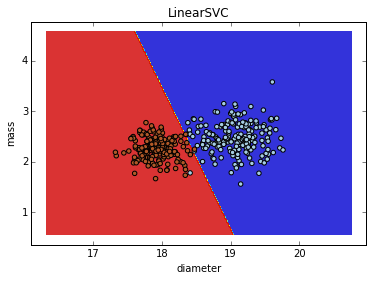

In [40]:
from sklearn import svm
grid_resolution = 0.01
svc = svm.SVC(kernel='linear', C=1.0).fit(data, labels)
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid( np.arange(x_min, x_max, grid_resolution),
                      np.arange(y_min, y_max, grid_resolution) )

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.8)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Paired)
plt.xlabel('diameter')
plt.ylabel('mass')
plt.title('LinearSVC')

plt.show()

Pretty close to our guess.

###Testing

How well did we actually do?  Let's measure it:

In [49]:
svc.score(data,labels)

0.99250000000000005

Looks pretty good.  But there is a subtle methodological error with this testing technique.  If you recall, we fit our svc on this data.  That is, we found an optimal solution that would correctly classify our training points.  So we are asking it to tell us it's performance on the data that we already knew the labels for, because we told it.  Not only that, we tried to find the most optimal solution on these points, so it stands to reason our error would naturally be pretty low.  The thing is, we will always be able to maintain a high level of model fit on data that we have known labels for.  For example, we could just come up with some crazy non-linear function to curve around all of the red dots on one side and blue on the other and have a perfect fit.  Intuitively, we know this would be a mistake.  If you're not sure why, maybe this xkcd is for you  http://xkcd.com/1122/.  Some data is comprehensible.  Some data is comprehensible only to God.  We call that data noise.  As soon as your model gets complicated enough to start modeling noise, you've encountered a problem called "overfit".  This is exactly why the above testing technique doesn't work, or rather why it doesn't generalize well to the problem at large.  Overfit is an instance of a violation of what we call the "Principle of Maximum Entropy" which is, stated very roughly, given two models:  one that fits the data perfectly, and one that fits the data so-so, pick the so-so one.  So how do we test, then?  The best answer is called cross validation.  What we do is split our data into training data and test data.  We train on the training data and test on the testing data and never the twain shall meet.  Since we want to train more than test, I reserved 40% of the samples for testing.  In the real world most test sets are something like the average of a 10% hold-out over several testing runs:

In [50]:
from sklearn import cross_validation
data_train, data_test, labels_train, labels_test = \
  cross_validation.train_test_split(data, labels, test_size=0.4, random_state=0)
svc = svm.SVC(kernel='linear', C=1.0).fit(data_train, labels_train)
svc.score(data_test,labels_test)

0.99375000000000002

###Sample Sizes

Now the question that arises is this:  how confident can we be that our performance on 80 samples (40 percent of 200) generalizes to our performance on millions of coins?

The relationship between confidence and sample sizes is summarized by Hoeffding's inequality.  Let's just pick some arbitrary numbers here that sound reasonable, plug them in, and compute the number of samples required just to get a feel for how the inequality works.  Say we want to be 95% confidence that the measured accuracy on our classifier is +-5% of the actual accuracy.  Hoeffding's inequality written in terms of probability is:

$$P[ |Ein - Eout| > \epsilon ] <= 2e^{-2\epsilon^{2N}}$$

This is saying that the probability that our error is greater than some small value epsilon is related to the number of samples we use to measure the error.  Ein is "in-sample error" or the error on our classification of coins we have labeled, Eout is the "out-of-sample error" or the error on things we haven't measured yet, or coins we have yet to see.  If we have 10 known coins, and we get 8 of them correct, our error is 2/10, or 0.2.  Call the left side p for simplicity, and rewriting this in terms of the number of samples N, so we can know how many samples we would need to achieve a certain level of confidence:
$$
\begin{align*}
\\ & ln(p) <= ln( 2e^{-2\epsilon^{2}N} )
\\ & ln(p) <= ln(2) + ln(e^{-2\epsilon^{2}N})
\\ & ln(p)-ln(2) <= ln(e^{-2\epsilon^{2}N})
\\ & ln(p/2) <= ln(e^{-2\epsilon^{2}N})
\\ & ln(p/2) <= -2\epsilon^{2}Nln(e)
\\ & ln(p/2) <= -2\epsilon^{2}N
\\ & ln(p/2) / (-2\epsilon^2) <= N
\end{align*}
$$

So plugging in our numbers, p is 1 - 0.95 = 0.05, epsilon is 0.05 and we have:

`N >= -ln(0.05/2) / (2 * 0.05^2)
N >= 737 samples`

So we would need at least 737 samples on an accuracy measurement to be 95% confident that the true accuracy of the classifier is within 5% of what we measured.  If we had that many samples, and measured the classifier performance at 80%, we could be 95% confident that the true performance is between 75% and 85%, in other words.

The thing to keep in mind with all of this is, we need 737 unseen samples (the so-called "out-samples") to measure the accuracy.  This means that we have fewer samples to train the classifier with.  So if we start with 10,000 labeled examples, we'd like to use 9,000 for training and 1,000 for testing.  Our confidence in the performance of the classifier would then be limited by the number of samples we used to measure it.  Since this is such a large number to hand-label, we typically have to be satisfied with a large range in the +- % measurement.  Raising the bar to +-10%, or 70% to 90% lets us get away with only 184 samples instead of 737.  Much more palatable in terms of what we need to label.

So back to our original question:  how confident can we be with 80 samples?  Let's set the acceptable error bar at +-10% or no less than 0.99375 - 0.1 = 0.89375 and we have:

$$2e^{-2(0.1)^2(80)} \approx 0.403$$

So there is less than a 40% chance that our actual performance is worse than ~89% and, if we raise the error bar to +-20%:

$$2e^{-2(0.2)^2(80)} \approx 0.003$$

which is less than 3 tenths of a percent chance that it is worse than ~79%.  Now we can go back to the product people with mathematical confidence and tell them we are 99% confident that our accuracy is better than 79% and, if you want tighter error bars, give us more budget for more test samples.

One great thing to keep in mind here is that this kind of test confidence works regardless of the type of test done, whether classifier performance, or A/B testing, or even political polling.  In fact you can tell that political pollsters don't know quite what they are doing when they report "3% of the population polled", because this equality states that it doesn't matter what percent of the population your sample is.  All that matters is the count..  well, and that they are drawn IID, but that's for another time.

###Deploying with Apache Spark

Apache spark contains a distributed implementation of map-reduce that runs single-stage and in-memory.  This technique, for many applications runs up to 100x faster than Hadoop, which uses a two-stage disk-based solution.  Spark comes with nice bindings for python and a machine learning library called MLLib that contain several commonly used machine learning primitives.  It comes bundled with an interpreter called pyspark, and installs easily on OSX via brew.  Here's a simple example that I ran on my laptop using pyspark deployed to a local instance that approximates pi using a monte carlo method:

We'll talk about parallelization to support problems at scale.

###Recommendation

Recommendation is not an entirely different problem from classification.  The neighborhood approach we used earlier is used quite frequently and is the basis for collaborative filtering techniques.  Sometimes the search is for neighboring users, sometimes it's for neighboring items.  Recommenders do, however, encounter data sparsity quite a bit as well as cold-start problems.  That is, what do you recommend when you have no information?  This is somewhat unique in that there is a really large-scale problem trying to be solved with often very little data.  We'll work through some of these recommendation examples:

* Neighborhood approaches
  * User-based collaborative filtering
  * Item-based collaborative filtering
* Model-based approaches
  * Probability models
  * Non-zero Matrix Factorization of Latent Models

as well as hybrid methods that combine both techniques such as the Bell-Kor solution to the Netflix prize.

###Similarity Measurements

I hinted at this earlier, but when we are plotting data and measuring distances between things, it makes sense to ask the question "How do we measure the distance between things?"  In order for machine learning algorithms to work, distance measurements must satisfy 4 basic metric properties.  That is, the distance function d returning the distance between x and y must not be ill-conditioned, and these are the conditions:

1. d(x, y) ≥ 0                     (non-negativity, or separation axiom)
2. d(x, y) = 0                     if and only if   x = y     (coincidence axiom)
3. d(x, y) = d(y, x)               (symmetry)
4. d(x, z) ≤ d(x, y) + d(y, z)     (subadditivity / triangle inequality)

We'll talk about some similarity measurements for the following types:
* strings
* images
* vectors

In [43]:
import jellyfish
print( jellyfish.jaro_winkler( 'batman', 'batman' ) )
print( jellyfish.jaro_winkler( 'batman', 'banana' ) )
print( jellyfish.jaro_winkler( 'batman', 'catwoman' ) )
print( jellyfish.jaro_winkler( 'batman', 'superman' ) )
print( jellyfish.jaro_winkler( 'batman', 'robin' ) )
print( jellyfish.jaro_winkler( 'robin', 'batman' ) )
print( jellyfish.jaro_winkler( 'batman', 'the joker' ) )


1.0
0.822222222222
0.819444444444
0.625
0.577777777778
0.577777777778
0.425925925926


So batman is more similar to a banana than he is to the joker.  Note that jaro_winkler distance is not a true metric, in that it violates the triangle inequality and the axiom that states that if d(x,y) = 0 then x = y.  But you've got 2 out of 4 working for you, and that ain't bad.

###Blocking and Indexing Techniques

Sometimes problems get really big and intractable.  We talked about parallelization as a technique to tackle large problems at scale.  But some big data problems are just bigger than your AWS budget.  For example, say you had a slick machine learning regression algorithm (we do) that lets you compare any two records and declare whether they are duplicates or not.  Assume you have 5 records in your database.  How many comparisons is that?

`[ 1, 2, 3, 4, 5 ]`

We need to compare 1 to 2, 3, 4, and 5.  2 to 3, 4, and 5 because we already compared it to 1, since comparing 1 to 2 is the same as comparing 2 to 1.  In general we will have, for each record in n, n-1 comparisons, but half that because we double-counted.  So:

`(n * (n-1))/2`

This is a special case of the binomial coefficient:

`(n choose k) = n! / (k! * (n - k)!)`

For our 5:

In [44]:
from scipy.misc import factorial
print( 'slow way {}'.format(factorial(5) / ( factorial(2) * factorial(5-2) )) )
print( 'fast way {}'.format((5 * 4) / 2.0) )

slow way 10.0
fast way 10.0


Now what happens if instead of 5 elements, we have 100,000 elements?

In [45]:
import profile
from pstats import Stats
from math import factorial
try:
    profile.run( 't1 = factorial(100000) / ( factorial(2) * factorial(100000-2) )', 'stats' )
    slow_time = Stats('stats').total_tt
    print( 'slow way {} in {} seconds'.format( t1, slow_time ) )
except Exception, ex:
    print( 'got an exception {}'.format(ex) )
profile.run( 't2 = int((100000 * 99999) / 2.0)', 'stats' )
fast_time = Stats('stats').total_tt
print( 'fast way {} in {} seconds'.format( t2, fast_time ) )

slow way 4999950000 in 6.944548 seconds
fast way 4999950000 in 0.000178999999989 seconds


A 100,000 record database takes about 5 billion pairwise comparisons.  It also took almost 7 seconds to simply compute this number.  This is why I introduced the closed form solution where k is 2.  Factorial is impossible to compute for large values (we could use Stirling or Ramanujan approximation, but you get the point!)  We couldn't even compute how long it would take for a large database without the simplified form.  Now, let's try something more reasonable like 1 million records:

In [46]:
lots = (1000000 * 999999) / 2.0
print( '{} comparisons'.format(lots) )
seconds = lots / 10000.0
days = seconds / ( 3600.0 * 24.0 )
print( 'That would take {} days!'.format(int(np.ceil(days))) )

4.999995e+11 comparisons
That would take 579 days!


This is why we need blocking techniques.  Blocking techniques reduce the search space so that you can process this many records in less than a day.  They rely on the fact that most comparisons are unnecessary, and so we can reduce the search space by coarse-grained similarity (same city, business name contains 'mart', etc.) and only then do our machine learning comparison.

###Natural Language Processing

Python's nltk (Natural Language Toolkit) is a repository of natural language processing tools.  It contains sample data sets for building prototypes, code for lexical and semantic analysis, and classifiers.  Here are a couple of simple example showcasing the library's Bayesian classifier on two small corpora:  human names and movie reviews.  The first attempts to detect the gender of the name, the second attempts to ascribe either positive or negative sentiment to a movie review based on the presence/absence of certain words.  

In [47]:
import nltk
import random
from nltk.corpus import names, movie_reviews

# Try to detect gender of name based on last letter
def gender_features(word):
    feats = { 'last_letter': word[-1] }
    return feats

data_labels = ( [ (name,'male') for name in names.words('male.txt')] + \
                [ (name,'female') for name in names.words('female.txt') ] )
random.shuffle(data_labels)
feature_sets = [ (gender_features(n), gender) for (n,gender) in data_labels ]
train_set, test_set = feature_sets[500:], feature_sets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print('-'*50)
print('name gender classifier accuracy {}'.format(nltk.classify.accuracy(classifier,\
                                                                         test_set)))
classifier.show_most_informative_features(10)


# Try to detect positive/negative sentiment of movie review based on 
# presence/absence of certain words
documents = [ (list(movie_reviews.words(fileid)), category) 
               for category in movie_reviews.categories() 
               for fileid in movie_reviews.fileids(category) ]

random.shuffle(documents)
all_words = nltk.FreqDist( w.lower() for w in movie_reviews.words() )
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    feats = {}
    for word in word_features:
        feats['contains({})'.format(word)] = (word in document_words)
    return feats

feature_sets = [ (document_features(d),c) for (d,c) in documents ]
train_set, test_set = feature_sets[100:], feature_sets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print('-'*50)
print( 'movie review sentiment classifier accuracy {}'\
       .format(nltk.classify.accuracy(classifier,test_set)) )
classifier.show_most_informative_features(10)

--------------------------------------------------
name gender classifier accuracy 0.752
Most Informative Features
             last_letter = u'a'           female : male   =     35.4 : 1.0
             last_letter = u'k'             male : female =     31.1 : 1.0
             last_letter = u'f'             male : female =     16.1 : 1.0
             last_letter = u'v'             male : female =     11.3 : 1.0
             last_letter = u'p'             male : female =     11.3 : 1.0
             last_letter = u'm'             male : female =      9.9 : 1.0
             last_letter = u'd'             male : female =      9.8 : 1.0
             last_letter = u'o'             male : female =      8.1 : 1.0
             last_letter = u'r'             male : female =      6.6 : 1.0
             last_letter = u'g'             male : female =      5.1 : 1.0
--------------------------------------------------
movie review sentiment classifier accuracy 0.65
Most Informative Features
          

We'll discuss natural language processing more in depth in future meetings.

###Schedule

We are shooting for one meeting each month.  The current thought is that the workshop style works best for data science info delivery.  Please reach out if you have any questions or suggestions.  -kpickrell